In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from skimage.feature import hog


In [28]:
DATASET_DIR = r"D:\projects\Dogs vs. Cats\PetImages"
CATEGORIES = ["Cat", "Dog"]
IMG_SIZE = 64


In [29]:
def extract_hog_features(image):
    image_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    features, _ = hog(image_resized,
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      block_norm='L2-Hys',
                      visualize=True)
    return features


In [30]:
def load_all_data_with_hog():
    data = []
    labels = []

    for category in CATEGORIES:
        path = os.path.join(DATASET_DIR, category)
        class_label = CATEGORIES.index(category)
        total = len(os.listdir(path))
        count = 0

        for img_name in tqdm(os.listdir(path), desc=f"Processing {category} ({total} files)"):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                features = extract_hog_features(img)
                data.append(features)
                labels.append(class_label)
                count += 1
            except Exception as e:
                continue

        print(f"✔️ Loaded {count} valid {category} images")

    return np.array(data), np.array(labels)

# Run it
X, y = load_all_data_with_hog()
print(f"\n📦 Total images loaded: {len(X)}")


Processing Cat (12501 files): 100%|██████████| 12501/12501 [02:25<00:00, 85.73it/s]


✔️ Loaded 12498 valid Cat images


Processing Dog (12501 files): 100%|██████████| 12501/12501 [02:29<00:00, 83.77it/s]


✔️ Loaded 12499 valid Dog images

📦 Total images loaded: 24997


In [31]:
X = X / np.max(X)  # Normalize

# PCA to reduce to top 150 features
pca = PCA(n_components=150)
X = pca.fit_transform(X)
print(f"📉 PCA reduced to {X.shape[1]} features")


📉 PCA reduced to 150 features


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"🧠 Training samples: {len(X_train)}")
print(f"🧪 Test samples: {len(X_test)}")


🧠 Training samples: 19997
🧪 Test samples: 5000


In [33]:
start_time = time.time()

model = SVC(kernel='rbf', C=10, gamma=0.01)
print("⏳ Training SVM model...")
model.fit(X_train, y_train)

print(f"✅ Training completed in {time.time() - start_time:.2f} seconds")


⏳ Training SVM model...
✅ Training completed in 46.16 seconds


In [34]:
y_pred = model.predict(X_test)

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=CATEGORIES))
print("🎯 Accuracy Score:", accuracy_score(y_test, y_pred))



📄 Classification Report:
              precision    recall  f1-score   support

         Cat       0.78      0.74      0.76      2515
         Dog       0.75      0.79      0.77      2485

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000

🎯 Accuracy Score: 0.7634


In [36]:
def show_predictions(X_raw, y_true, y_pred, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        img = X_raw[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {CATEGORIES[y_true[i]]}\nPred: {CATEGORIES[y_pred[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [38]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1️⃣ Define and Train the Model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf.fit(X_train, y_train)

# 2️⃣ Predict on Test Set
y_pred = clf.predict(X_test)


📊 Classification Report:

              precision    recall  f1-score   support

         Cat       0.79      0.78      0.79      2515
         Dog       0.78      0.80      0.79      2485

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



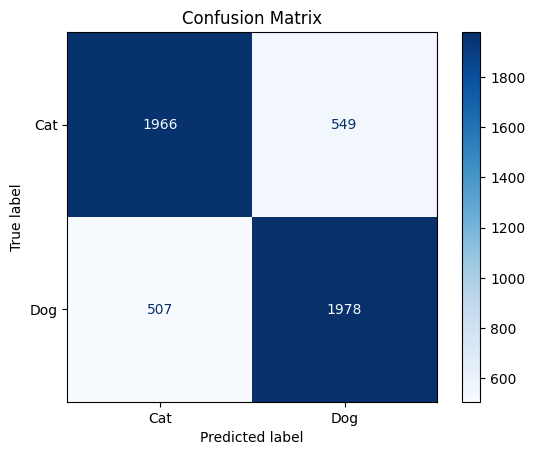

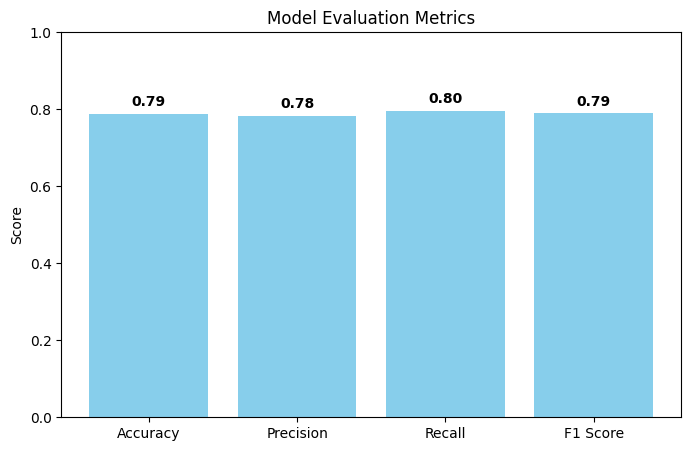

In [39]:
# 3️⃣ Compute Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 4️⃣ Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 6️⃣ Bar Plot for Evaluation Metrics
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()



In [40]:
import random

# Select random indices to visualize
sample_indices = random.sample(range(len(X_test)), 5)

for idx in sample_indices:
    true_label = 'Dog' if y_test[idx] == 1 else 'Cat'
    pred_label = 'Dog' if y_pred[idx] == 1 else 'Cat'
    
    print(f"📌 Sample #{idx}")
    print(f"✅ Actual: {true_label}")
    print(f"🔮 Predicted: {pred_label}")
    print("-" * 30)


📌 Sample #900
✅ Actual: Dog
🔮 Predicted: Cat
------------------------------
📌 Sample #1744
✅ Actual: Cat
🔮 Predicted: Cat
------------------------------
📌 Sample #3813
✅ Actual: Cat
🔮 Predicted: Cat
------------------------------
📌 Sample #4097
✅ Actual: Dog
🔮 Predicted: Dog
------------------------------
📌 Sample #1407
✅ Actual: Dog
🔮 Predicted: Cat
------------------------------


In [41]:
image_paths = []  # Store while loading

# while loading:
# image_paths.append(filepath)


In [45]:
from tqdm import tqdm
import os
import cv2
import numpy as np

IMG_SIZE = 64
DATA_DIR = r"D:\projects\Dogs vs. Cats\PetImages"

X = []
y = []
image_paths = []

def load_images(label_name, label_val):
    folder_path = os.path.join(DATA_DIR, label_name)
    for img_name in tqdm(os.listdir(folder_path), desc=f"Processing {label_name} images"):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img.flatten())
            y.append(label_val)
            image_paths.append(img_path)  # 🔁 Store path
        except:
            continue

load_images('Cat', 0)
load_images('Dog', 1)

X = np.array(X)
y = np.array(y)


Processing Dog images: 100%|██████████| 12501/12501 [00:12<00:00, 1035.41it/s]


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, path_train, path_test = train_test_split(
    X, y, image_paths, test_size=0.2, random_state=42
)


c:\Users\anujn\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anujn\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


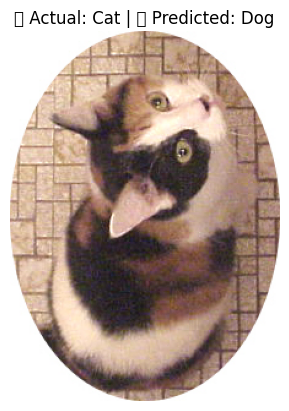

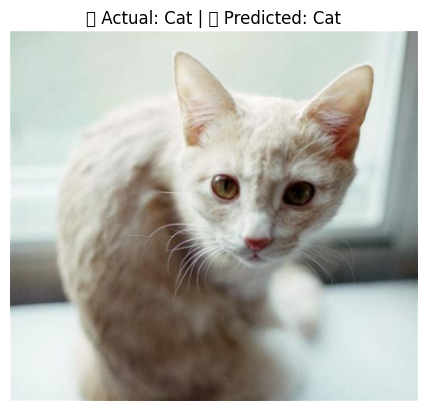

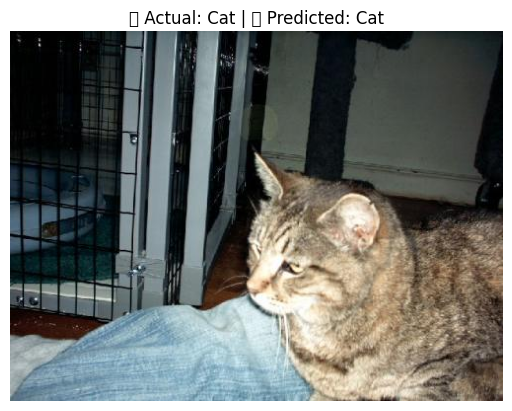

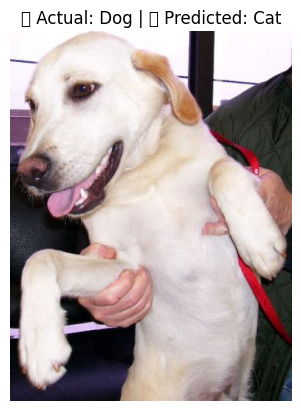

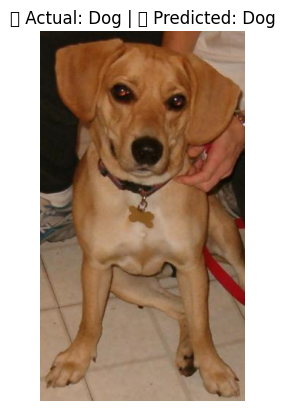

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Choose random 5 samples to display
sample_indices = random.sample(range(len(X_test)), 5)

for idx in sample_indices:
    img_path = path_test[idx]
    img = Image.open(img_path)

    true_label = 'Dog' if y_test[idx] == 1 else 'Cat'
    pred_label = 'Dog' if y_pred[idx] == 1 else 'Cat'

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"✅ Actual: {true_label} | 🔮 Predicted: {pred_label}")
    plt.show()


In [48]:
print(f"🔚 Final Summary:")
print(f"🧠 Model: SVM with RBF Kernel")
print(f"📈 Accuracy: {acc:.2f}")
print(f"🎯 Precision: {prec:.2f}")
print(f"🔁 Recall: {rec:.2f}")
print(f"🏅 F1 Score: {f1:.2f}")


🔚 Final Summary:
🧠 Model: SVM with RBF Kernel
📈 Accuracy: 0.79
🎯 Precision: 0.78
🔁 Recall: 0.80
🏅 F1 Score: 0.79
